<span style="font-family: Palatino; font-size: 40px; color:purple">
    Homework 1: How good are financial models?
</span>

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime

import copy as cp

DATA_PATH = "./HW/FinancialMath/data/"

In [3]:
HW01_SPX = pd.read_csv("HW01_SPX.csv")
SPX_put = pd.read_csv("SPX_put_X20210716.csv")

#  <span style="font-family: Palatino; font-size: 30px; color:purple">Getting comfortable with some financial math </span>

In this home work, you will get some experience working with some common financial mathematics and then have a chance to see if you can use this to do some financial data mining.

(Note that for purposes of this home work, we are making some simplifying assumptions about the data (e.g., that we can ignore weekends and holidays; that we don't need write extra code to make our functions fail gracefully, such as code  to check to see if a date is out of range; etc.)

## <span style="font-family: Palatino; font-size: 24px; color:purple">Return math </span>

### Calculate returns and log returns for the following price series.  Compare the two.  What do you notice?

| DOW  | Closing Price |
|------|---------------|
| Mon  | \$1.00        |
| Tue  | \$1.50        |
| Wed  | \$1.00        |
| Thr  | \$0.50        |

| DOW  | ret     |   log ret |
|------|---------|-----------|
| Mon  | -       |           |
| Tue  |   50\%  |   40.5\%  |
| Wed  |  -30\%  |  -40.5\%  |
| Thr  |  -50\%  |  -40.5\%  |    

In [4]:
#return
return_t = (1.5-1)/1
return_w = (1-1.5)/1.5
return_th = (0.5-1)/1

print("Return for Tuesday is $",return_t)
print("Return for Wednesday is $",return_w)
print("Return for Thursday is $",return_th)

Return for Tuesday is $ 0.5
Return for Wednesday is $ -0.3333333333333333
Return for Thursday is $ -0.5


Return for Tuesday is $ 0.5

Return for Wednesday is $ -0.3333333333333333

Return for Thursday is $ -0.5

In [5]:
#log return
log_t = np.log(1.5/1)*100
log_w = np.log(1/1.5)*100
log_th = np.log(0.5/1)*100

print("Log Return for Tuesday is", log_t,"%")
print("Log Return for Wednesday is", log_w,"%")
print("Log Return for Thursday is", log_th,"%")

Log Return for Tuesday is 40.546510810816436 %
Log Return for Wednesday is -40.54651081081644 %
Log Return for Thursday is -69.31471805599453 %


**Read in the file `HW01_SPX.csv`.**

### Calculate returns and log returns for the closing price and plot the distribution of the log returns. What do you notice?  (Hint: Use a large bin number like 41 or 51.)  Add two new columns to your S&P data frame: `ret` and  `log_ret`.

In [41]:
HW01_SPX

,Date,Open,High,Low,Close,Return,Log_Return
0,2000-01-03,1455.22,1478.00,1438.36,1455.22,NaN,NaN
1,2000-01-04,1399.42,1455.22,1397.43,1399.42,-0.038345,-0.039099
2,2000-01-05,1402.11,1413.27,1377.68,1402.11,0.001922,0.001920
3,2000-01-06,1403.45,1411.90,1392.02,1403.45,0.000956,0.000955
4,2000-01-07,1441.47,1441.47,1400.53,1441.47,0.027090,0.026730
...,...,...,...,...,...,...,...
5414,2021-07-12,4372.41,4386.68,4364.03,4384.63,0.003451,0.003445
5415,2021-07-13,4381.07,4392.37,4366.92,4369.21,-0.003517,-0.003523
5416,2021-07-14,4380.11,4393.68,4362.36,4374.30,0.001165,0.001164
5417,2021-07-15,4369.02,4369.02,4340.70,4360.03,-0.003262,-0.003268


In [7]:
HW01_SPX["Return"] = (HW01_SPX["Close"].pct_change())

In [8]:
HW01_SPX["Log_Return"] = (np.log(HW01_SPX["Close"]/HW01_SPX["Close"].shift(1)))



(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 5.000e+00,
        4.000e+00, 8.000e+00, 1.300e+01, 1.600e+01, 4.600e+01, 7.900e+01,
        1.380e+02, 2.780e+02, 5.570e+02, 1.238e+03, 1.592e+03, 8.090e+02,
        3.530e+02, 1.280e+02, 5.900e+01, 3.100e+01, 2.200e+01, 1.000e+01,
        8.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.12765214, -0.12186619, -0.11608023, -0.11029428, -0.10450833,
        -0.09872237, -0.09293642, -0.08715047, -0.08136451, -0.07557856,
        -0.0697926 , -0.06400665, -0.0582207 , -0.05243474, -0.04664879,
        -0.04086284, -0.03507688, -0.02929093, -0.02350498, -0.01771902,
        -0.01193307, -0.00614711, -0.00036116,  0.00542479,  0.01121075,
         0.0169967 ,  0.02278265,  0.02856861,  0.03435456,  0.04014052,
         0.04592647,  0.05171242,  0.05749838,  0.063

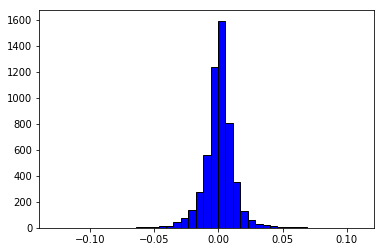

In [9]:
plt.hist(HW01_SPX["Log_Return"], color = 'blue', edgecolor = 'black', bins = 41)




**The log return distribution somewhat represents a normal distribution.**

#### Plot the returns against the log returns using the same axis limits on the x and y axes.  Write down your observations.

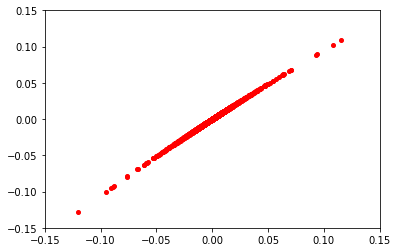

In [10]:
plt.plot(HW01_SPX["Return"], HW01_SPX["Log_Return"], 'ro', markersize = 4)
plt.axis([-0.15, 0.15, -0.15,  0.15])
plt.show()


**The observation plot represents a somewhat straight line. This suggests that the returns and log returns have little difference.**

### Calculate the volatility of the equity series over the most recent 30, 90, 120 and 360 days.  For now, you may assume that calendar days are equivalent to trading days (i.e., that there are no days on which trading is not done, and that the last $x$ observations in the data frame represent the last $x$ days).   Has the market become more or less volatile in the past 120 days?

In [11]:
np.std(HW01_SPX["Return"][-30:], ddof=1 )

0.005724051108350765

In [12]:
np.std(HW01_SPX["Return"][-90:],  ddof=1 )

0.006948492055594805

In [13]:
np.std(HW01_SPX["Return"][-120:],  ddof=1 )

0.00847155600783947

In [14]:
np.std(HW01_SPX["Return"][-360:],  ddof=1 )

0.018766654064227898

**We can see that volatility increases as the days increase. Therefore, this sugguests that market is becoming more volatile in the past 120 days**

### Repeat this again, but this time for the (end) date 2021-06-21.

In [15]:
#30 days
np.std(HW01_SPX["Return"][5370:5401],  ddof=1 )

0.007965966105401581

In [16]:
#90 days
np.std(HW01_SPX["Return"][5310:5401],  ddof=1 )

0.008397351028491025

In [17]:
#120 days
np.std(HW01_SPX["Return"][5280:5401],  ddof=1 )

0.008711173331491202

In [18]:
np.std(HW01_SPX["Return"][5040:5401],  ddof=1 )

0.01880583659956322

**We can see that volatility increases as the days increase. Therefore, this sugguests that market is becoming more volatile.**

# <span style="font-family: Palatino; font-size: 24px; color:purple"> Valuing options </span>

Recall that we may calculate the value of a European put, $P(\cdot)$, under the Black-Scholes-Merton pricing framework as:

\begin{equation}
	P= \ N(- d_2)K e^{-rt}  - N(-d_1) S ,~\text{where} 
\end{equation}

\begin{equation}
	d_1= \frac{1}{\sigma \sqrt{t}} \left[\ln{\left(\frac{S}{K}\right)} + \left(r + \frac{\sigma^2}{2} t\right) \right],
\end{equation}

\begin{eqnarray*}
	d_2 &=& \frac{1}{\sigma \sqrt{t}} \left[\ln{\left(\frac{S}{K}\right)} + \left(r - \frac{\sigma^2}{2} \right) \right]\\
    &=& d_1 - \sigma t, ~~ \text{and}
\end{eqnarray*}

\begin{equation}
	N(x)=\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{1}{2}z^2} dz~ ;
\end{equation}

\noindent and where:

\begin{eqnarray*}
	t		& \equiv &\text{the time (in years) between today and the expiration of the option, i.e., $T-t_0$, where, $T$ is the closing date;}\\
	S   	& \equiv & \text{the price of the stock today;}\\
	K		& \equiv &\text{the price at which the option holder may sell the stock at time $t$;}\\
	\sigma	& \equiv &\text{the property-specific price volatility (e.g., as measured by the volatility of the AVM estimates);}\\
	r		& \equiv &\text{the risk free rate (e.g., on U.S. government securites with a maturity date of today+$t$});\\ 
	N(x)		& \equiv &\text{the standard normal cdf evaluated at $x$}; \text{ and}\\
	 P      &    =    & P(S,K,\sigma,r, t) \equiv \text{the value of a European put option allowing the holder to sell one share of the underlying stock at price $K$ in $t$ years. } \\
					&           &\text{$S$ today at price $K$ at time $t$, given an annualized volatility of $\sigma$ and a risk-free rate $r$ }.
\end{eqnarray*}

Note that $N(x)$ is the standard normal CDF (i.e., mean $\mu = 0$  and variance $\sigma^2 = 1$), which we can approximate numerically using the `scipy.stats` function `norm.cdf(x, 0, 1)`. 


### Write a python function `EuroPut(S,K, sigma, r, t)` to price a European put option

In [19]:
from scipy.stats import norm
import math

In [20]:
N = norm.cdf
def EuroPut(S, K, sigma, r, t):
    d1 = ( (1/(sigma*np.sqrt(t))) * ( np.log(S/K) + (r + (np.power(sigma,2))/2)*t  ))
    #d2 = ((np.log(S/K) + (r - ((np.power(sigma, 2))/2))))/sigma*(np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    P = N(-d2, 0, 1)*K*math.exp(-r*t) - N(-d1, 0, 1)*S
    
    return P


### Use the function you wrote to price an option on a stock with the following characteristics:




|                        |           |
|------------------------|-----------|
|price today             | \$20.00   |
|exercise price          | \$35.00   |
|time to expiration (yrs)|    1.00   |
|volatility              |    0.25   |
|risk-free rate          |    0.05   |


In [21]:
EuroPut(20, 35, 0.25, 0.05, 1.0)

13.342106213937623

#### Plot <br> 
<b>(a) the price of the put option for volatility values of `[0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.4]`; and <br> 
(b) price the put option for time to expiration values of `[0.25, 0.50, 0.75, 1.0, 1.25, 1.5, 2.0]`.</b>

_(Two seperate plots)_

In [22]:
sig = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.4]
time = [0.25, 0.50, 0.75, 1.0, 1.25, 1.5, 2.0]

In [23]:
#the price of the put option for volatility values
print(EuroPut(20, 35, 0.05, 0.05, 1.0))
print(EuroPut(20, 35, 0.1, 0.05, 1.0))
print(EuroPut(20, 35, 0.15, 0.05, 1.0))
print(EuroPut(20, 35, 0.2, 0.05, 1.0))
print(EuroPut(20, 35, 0.25, 0.05, 1.0))
print(EuroPut(20, 35, 0.3, 0.05, 1.0))
print(EuroPut(20, 35, 0.35, 0.05, 1.0))
print(EuroPut(20, 35, 0.4, 0.05, 1.0))


13.293029857524992
13.293029939451085
13.293367798740647
13.301895472341705
13.342106213937623
13.43384914500923
13.582201279981447
13.782727769860102


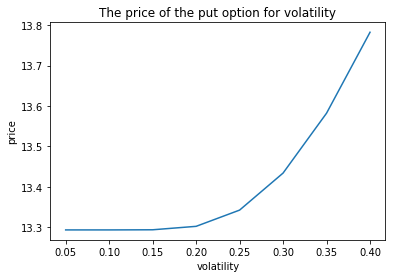

In [24]:
price_v = [(EuroPut(20, 35, 0.05, 0.05, 1.0)), (EuroPut(20, 35, 0.1, 0.05, 1.0)), (EuroPut(20, 35, 0.15, 0.05, 1.0)),
(EuroPut(20, 35, 0.2, 0.05, 1.0)), (EuroPut(20, 35, 0.25, 0.05, 1.0)), (EuroPut(20, 35, 0.3, 0.05, 1.0)), 
(EuroPut(20, 35, 0.35, 0.05, 1.0)), (EuroPut(20, 35, 0.4, 0.05, 1.0))]
volatility=[0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.4]    

plt.plot(volatility, price_v)
plt.title("The price of the put option for volatility")
plt.xlabel("volatility")
plt.ylabel("price")
plt.show()
       

In [25]:
#price the put option for time to expiration values
print(EuroPut(20, 35, 0.05, 0.05, 0.25))
print(EuroPut(20, 35, 0.1, 0.05, 0.5))
print(EuroPut(20, 35, 0.15, 0.05, 0.75))
print(EuroPut(20, 35, 0.2, 0.05, 1))
print(EuroPut(20, 35, 0.25, 0.05, 1.25))
print(EuroPut(20, 35, 0.3, 0.05, 1.5))
print(EuroPut(20, 35, 0.35, 0.05, 1.2))

14.565223017285852
14.135846920991646
13.711826704498435
13.301895472341705
12.986639208457351
12.87565066898544
13.401376698250676


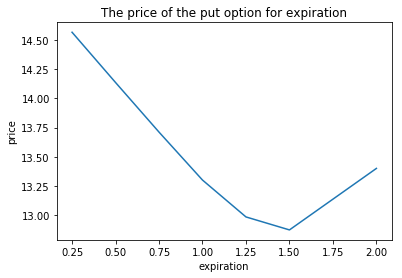

In [26]:
price_e = [(EuroPut(20, 35, 0.05, 0.05, 0.25)), (EuroPut(20, 35, 0.1, 0.05, 0.5)), (EuroPut(20, 35, 0.15, 0.05, 0.75)),
(EuroPut(20, 35, 0.2, 0.05, 1)), (EuroPut(20, 35, 0.25, 0.05, 1.25)), (EuroPut(20, 35, 0.3, 0.05, 1.5)), (EuroPut(20, 35, 0.35, 0.05, 1.2))]
            
            
expiration=[0.25, 0.50, 0.75, 1.0, 1.25, 1.5, 2.0]    

plt.plot(expiration, price_e)
plt.title("The price of the put option for expiration")
plt.xlabel("expiration")
plt.ylabel("price")
plt.show()

### Imagine that the actual closing price of the option today is \$14.25.  What value of volatility is implied given the price in the marketplace? (Hint, use your `EropeanPut` function to search for a value of `sigma` that makes the price equal to $\$14.75 \pm \$0.005$ or less by trying different values of `sigma`.)

In [27]:
p = EuroPut(20,35,0.49,.05,1)
p

14.24996615668878

**sigma = 0.49 would be it. We can simply look at the graph and expiration = 0.49 seems to be approrpriate.**

# <span style="font-family: Palatino; font-size: 30px; color:purple"> How well does Black-Scholes predict?

**Read in the file `SPX_put_X20210716.csv`** which contains several months of history for an option on the S&P500 index.  

The terms of the option are:

|                        |           |
|------------------------|-----------|
|current_price           | in `underlying_last`|
|strike price            | \$3685    |
|expiration date         | 2021-07-16|
|risk-free rate          |  0.0025 * |

\* the risk-free rate varies daily, but for convenience in this example we have set it to a constant value.

### Use your `EuroPut` function to price the option as of the first date in our data set (2021-06-21).  Use volatilities you calculated from that date back 30 days and 120 days.

In [28]:
SPX_put.head()

,Unnamed: 0,quote_unixtime,quote_readtime,quote_date,quote_time_hours,underlying_last,expire_date,expire_unix,strike,p_bid,p_ask,p_size,p_last,p_volume,strike_distance,strike_distance_pct
0,108508,1624305600,2021-06-21 16:00,2021-06-21,16,4224.66,2021-07-16,1626465600,3685,5.09,5.30,923 x 811,0.0,,539.7,0.128
1,116717,1624392000,2021-06-22 16:00,2021-06-22,16,4246.38,2021-07-16,1626465600,3685,3.90,4.09,1389 x 100,0.0,,561.4,0.132
2,125088,1624478400,2021-06-23 16:00,2021-06-23,16,4241.83,2021-07-16,1626465600,3685,3.40,3.61,886 x 1621,0.0,,556.8,0.131
3,133233,1624564800,2021-06-24 16:00,2021-06-24,16,4266.39,2021-07-16,1626465600,3685,2.85,3.00,106 x 1310,0.0,,581.4,0.136
4,141537,1624651200,2021-06-25 16:00,2021-06-25,16,4280.68,2021-07-16,1626465600,3685,2.21,2.35,109 x 401,0.0,,595.7,0.139


In [29]:
#30 days
sigma = np.std(HW01_SPX["Return"][5370:5400],  ddof=1 ) * np.sqrt(365)

start = datetime(2021, 6, 21)
end = datetime(2021, 7, 16)
diff = end - start
t = (diff.days + diff.seconds/86400)/365
S = SPX_put["underlying_last"][0]
K = SPX_put["strike"][0]
r = 0.0025

EuroPut(S, K, sigma, r, t)

0.006762959166845217

In [30]:
#90 days

sigma = np.std(HW01_SPX["Return"][5280:5401],  ddof=1 ) * np.sqrt(365)

start = datetime(2021, 6, 21)
end = datetime(2021, 7, 16)
diff = end - start
t = (diff.days + diff.seconds/86400)/365
S = SPX_put["underlying_last"][0]
K = SPX_put["strike"][0]
r = 0.0025

EuroPut(S, K, sigma, r, t)

0.03944987844840542

### Now write a short function to calculate the implied volatility for all of the options prices in the data set (you may assume that the data conventions are the same in both the SPX and SPX put option files):

In [39]:
def IV(S,K,r,t,target_price,bound=.005):
    vol = 0
    call = EuroPut(S,K,vol,r,t) 
    step_size = 0.01 
    if call > target_price + bound:
        return
    else:
        while True: 
            next_price = EuroPut(S,K,step_size,r,t)
            if next_price < target_price:
                vol = vol + step_size
            else:
                high_vol = vol + step_size
                vol_low = vol

        while abs(target_price - call) > bound: 
            vol = (vol_up-vol_low)/2
            p = EuroPut(S,K,vol,r,t)
            if target_price - call > 0:
                vol_low = vol
            else:
                vol_up = vol
    return vol
    

In [40]:
implied_vol = []

K = 3685
r = .0025
end_date = datetime(2021,7,16)

for i in range(len(SPX_put['p_last'])-1):
    price = SPX_put['p_last'][i]
    S = SPX_put['underlying_last'][i]
    
    t_str = SPX_put['quote_date'][i]
    split = t_str.split('-')
    split1 = list(map(int, split))
    start_date = datetime(split1[0],split1[1],split1[2])
    difference  = end_date - start_date
    t = (difference.days + difference.seconds/86400)/365 #have to adjust for year
    implied_vol.append(IV(S,K,r,t,price,bound=.005))
print(implied_vol)

[1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 1e-08, 0.33203126, 0.352734385, 0.3796875099999999, 0.44453125999999993, 0.4773437599999999, 0.4734375099999999, 0.45312500999999994, 0.6093750099999999, 0.69062501, 0.8531250099999999, 1.1812500100000003]


This is the implied volatility results

### Next calculate the _ratio_ of the implied volatility to the realized volatility at 120 days for all option prices in the options data and plot the distribution (don't worry about error trapping, etc.).


In [180]:
for i in range(len(SPX_put['p_last'])-1):
    S = SPX_put['underlying_last'][5401:5426]
    price = SPX_put['p_last'][5401:5426]
    op_prices.append(price)
    
    date_ind = HW01_SPX["Date"][5401:5426]
    real_vol.append((np.std(HW01_SPX["Return"][5280:5400],  ddof=1 ))*np.sqrt(365))


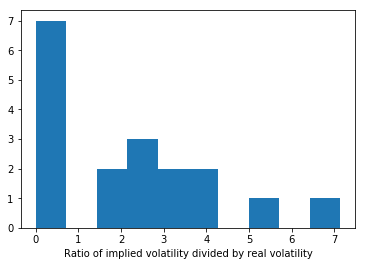

In [362]:
ratio = []
for v in range(len(real_vol[1:19])):
    ratio.append(imp_vol[v]/real_vol[v])
plt.hist(ratio)
plt.xlabel('Ratio of implied volatility divided by real volatility')
plt.show()

# <span style="font-family: Palatino; font-size: 24px; color:purple">Some data financial data mining</span>


## Now create a new data set for modeling (with lagged features)

1. The data set should contain $R_t$ as well as all of the the original data from the the options data set _except_ for`underlying_last_t1`.  
2. Next create a new variable, `underlying_last_t1` that contains all of the values of `underlying_last` shifted forward one day.  
3. Example: The row of the final data set for the date 2021-06-28, would contain all of the data for 2021-06-28 (except that day's value of `underlying_last`), and also and _tomorrow's_ (2021-06-29) value of `underlying_last` which would be stored in the variable `underlying_last_t1` in the row for 2021-06-28.

In [215]:
SPX_put.head()

,Unnamed: 0,quote_unixtime,quote_readtime,quote_date,quote_time_hours,underlying_last,expire_date,expire_unix,strike,p_bid,p_ask,p_size,p_last,p_volume,strike_distance,strike_distance_pct,underlying_last_t1
0,108508,1624305600,2021-06-21 16:00,2021-06-21,16,4224.66,2021-07-16,1626465600,3685,5.09,5.30,923 x 811,0.0,,539.7,0.128,0.00
1,116717,1624392000,2021-06-22 16:00,2021-06-22,16,4246.38,2021-07-16,1626465600,3685,3.90,4.09,1389 x 100,0.0,,561.4,0.132,4224.66
2,125088,1624478400,2021-06-23 16:00,2021-06-23,16,4241.83,2021-07-16,1626465600,3685,3.40,3.61,886 x 1621,0.0,,556.8,0.131,4246.38
3,133233,1624564800,2021-06-24 16:00,2021-06-24,16,4266.39,2021-07-16,1626465600,3685,2.85,3.00,106 x 1310,0.0,,581.4,0.136,4241.83
4,141537,1624651200,2021-06-25 16:00,2021-06-25,16,4280.68,2021-07-16,1626465600,3685,2.21,2.35,109 x 401,0.0,,595.7,0.139,4266.39


In [186]:
SPX_put["underlying_last_t1"] = SPX_put["underlying_last"].shift(1)

In [214]:
SPX_put['underlying_last_t1'] = SPX_put['underlying_last_t1'].fillna(0)

## Use your new data set:  Build a (small!) decision tree classifier to predict whether the options price will rise or fall tomorrow, using any of the variables you like.  You may also include the current value of estimated volatility, if you would like.  Please show your results and discuss (1-2 paragraphs) your impressions.  Does the implied volatility provide any useful power?

In [287]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model           import LogisticRegression# Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
from sklearn import utils



In [323]:
SPX_put.columns

Index(['Unnamed: 0', 'quote_unixtime', 'quote_readtime', 'quote_date',
       'quote_time_hours', 'underlying_last', 'expire_date', 'expire_unix',
       'strike', 'p_bid', 'p_ask', 'p_size', 'p_last', 'p_volume',
       'strike_distance', 'strike_distance_pct', 'underlying_last_t1'],
      dtype='object')

In [330]:
feature_cols = ['underlying_last',
       'strike', 'p_bid', 'p_size', 'p_last',
       'strike_distance', 'strike_distance_pct', 'underlying_last_t1']
X = SPX_put[feature_cols]
y = SPX_put.underlying_last

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [335]:
len(y_train)

13

In [343]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_Y = label_encoder.fit_transform(y_train)
# train_X = label_encoder.fit_transform(X_train)
test_Y = label_encoder.fit_transform(y_test)
# test_X = label_encoder.fit_transform(X_test)


In [344]:
# utils.multiclass.type_of_target(X_train)

In [348]:
clf = DecisionTreeClassifier()
# clf.fit(X_train.values.reshape(-1, 1), y_train)
clf.fit(train_X.reshape(-1, 1), train_Y)
print("Accuracy:", metrics.accuracy_score(test_Y, y_pred))

Accuracy: 0.16666666666666666


**I first divided the data into 70 percent training and 30 percent testing. Not a very great decision tree. Implied volatility seems to have not helped in this case. I got an accuracy rate of 0.16666666666666666.**

**In the future, we could use larger datasets. Since this was a smaller dataset, there could be missing vital innformation which could be helpful to make a better decision tree with high accuracy.**

# Extra Credit* (not required)

## Flexing with a larger data set

If you are feeling ambitious, or you are just intrigued by this problem, you can load the data set: `HW01_SPX_2021_eod.txt` (tab delimited) which contains just under 1MM records, in the same format as the data you have been using (but there is now an extra column `p_iv` which contains the pre-computed implied volatility. In this case, I have only included records for which there was actually volume traded in the option on the date indicated.  (Why might this be a bad idea if we were trying to do this for real??)  Can you do better than Black-Scholes?  How would you test your model?

In [521]:
f = open("HW01_SPX_2021_eod.txt", "r")
print(f.readline())
print(f.readline())

quote_unixtime	quote_readtime	quote_date	quote_time_hours	underlying_last	expire_date	expire_unix	strike	p_bid	p_ask	p_size	p_last	p_iv	p_volume	strike_distance	strike_distance_pct

1609794000	 2021-01-04 16:00	 2021-01-04	16	3701.38	 2021-02-19	1613768400	100	0	0.04	 0 x 296	0	2.83668	 	3601.4	0.973



Implied volatility is just the market's forecast of a likely movement in security's price. It is used to outline future moves and supplies and demands. This provides insight into how the market thinnks about a stock movement. Since this volatility is forcasting, it's important to include records for volumes traded and not traded for possible comparison. It's basically leaving our vital information. In real life, there is so much uncertanity and chaos. Even working with finance math like this, investors don't even know how true the math is. But leaving out information such as no volume traded can cause bias and inaccurate. 

Yes, we can do better than black-scholes. Black-scholes assumes that the volaility is constant, while heston model allows stochastic volatility which allows for more flexibility and can perform better with data!